# BEE 4750 Lab 2: Monte Carlo

**Name**:

**ID**:

> **Due Date**
>
> Thursday, 10/02/25, 9:00pm

## Setup

The following code should go at the top of most Julia scripts; it will
load the local package environment and install any needed packages. You
will see this often and shouldn’t need to touch it.

In [1]:
import Pkg
Pkg.activate(".")
Pkg.instantiate()

In [1]:
using Random # random number generation
using Distributions # probability distributions and interface
using Statistics # basic statistical functions, including mean
using Plots # plotting

## Overview

In this lab, we will conduct a Monte Carlo experiment and explore how
sensitive Monte Carlo estimates are to the underlying probability
distribution(s).

You should always start any computing with random numbers by setting a
“seed,” which controls the sequence of numbers which are generated
(since these are not *really* random, just “pseudorandom”). In Julia, we
do this with the `Random.seed!()` function.

In [1]:
Random.seed!(1)

TaskLocalRNG()

It doesn’t matter what seed you set, though different seeds might result
in slightly different values. But setting a seed means every time your
notebook is run, the answer will be the same.

> **Seeds and Reproducing Solutions**
>
> If you don’t re-run your code in the same order or if you re-run the
> same cell repeatedly, you will not get the same solution. If you’re
> working on a specific problem, you might want to re-use
> `Random.seed()` near any block of code you want to re-evaluate
> repeatedly.

### Probability Distributions and Julia

Julia provides a common interface for probability distributions with the
[`Distributions.jl`
package](https://juliastats.org/Distributions.jl/stable/). The basic
workflow for sampling from a distribution is:

1.  Set up the distribution. The specific syntax depends on the
    distribution and what parameters are required, but the general call
    is the similar. For a normal distribution or a uniform distribution,
    the syntax is

    ``` julia
    # you don't have to name this "normal_distribution"
    # μ is the mean and σ is the standard deviation
    normal_distribution = Normal(μ, σ)
    # a is the upper bound and b is the lower bound; these can be set to +Inf or -Inf for an unbounded distribution in one or both directions.
    uniform_distribution = Uniform(a, b)
    ```

    There are lots of both
    [univariate](https://juliastats.org/Distributions.jl/stable/univariate/#Index)
    and
    [multivariate](https://juliastats.org/Distributions.jl/stable/multivariate/)
    distributions, as well as the ability to create your own, but we
    won’t do anything too exotic here.

2.  Draw samples. This uses the `rand()` command (which, when used
    without a distribution, just samples uniformly from the interval
    $[0, 1]$.) For example, to sample from our normal distribution
    above:

    ``` julia
    # draw n samples
    rand(normal_distribution, n)
    ```

Putting this together, let’s say that we wanted to simulate 100
six-sided dice rolls. We could use a [Discrete Uniform
distribution](https://juliastats.org/Distributions.jl/stable/univariate/#Distributions.DiscreteUniform).

In [1]:
dice_dist = DiscreteUniform(1, 6) # can generate any integer between 1 and 6
dice_rolls = rand(dice_dist, 100) # simulate rolls

100-element Vector{Int64}:
 1
 3
 5
 4
 6
 2
 5
 5
 5
 2
 ⋮
 3
 6
 5
 5
 6
 3
 6
 6
 6

And then we can plot a histogram of these rolls:


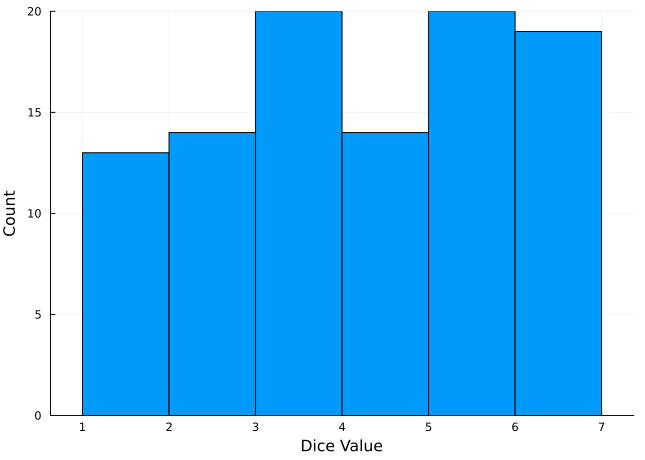

In [1]:
histogram(dice_rolls, legend=:false, bins=6)
ylabel!("Count")
xlabel!("Dice Value")

### Instructions

**Remember to**:

-   Evaluate all of your code cells, in order (using a `Run All`
    command). This will make sure all output is visible and that the
    code cells were evaluated in the correct order.
-   Tag each of the problems when you submit to Gradescope; a 10%
    penalty will be deducted if this is not done.

## Problem

A common engineering problem is to quantify flood risk, which is
typically computed by propagating a flood hazard distribution through a
*depth-damage function* relating flood depths to economic damages. A
reasonable depth-damage function for a house without a basement is a
bounded logistic function,
$$d(h) = \mathbb{1}_{h > 0} \frac{L}{1 + \exp(-k (h - h_0))},$$

where $d$ is the damage as a percent of total structure value, $h$ is
the water depth (relative to the house’s ground floor elevation) in m,
$\mathbb{1}_{x > 0}$ is the indicator function, $L$ is the maximum loss
in USD, $k$ is the slope of the depth-damage relationship, and $h_0$ is
the inflection point. We’ll assume $L=\$200,000$, $k=0.8$, and $h_0=3$.

For this problem, suppose that we have two different probability
distributions characterizing annual maxima flood depths:

1.  $h \sim LogNormal(1.2, 0.3)$;
2.  $h \sim GeneralizedExtremeValue(3, 0.9, -0.15)$.

Plot histograms of samples from these distributions and conduct a Monte
Carlo experiment for annual maximum flood damages using each. Answer the
following questions:

-   What are the Monte Carlo estimates of the expected value and the 99%
    quantile for the annual maximum damage the structure would suffer
    for each of these flood hazard distributions?
-   How did you decide on your sample size?
-   Why do you think the estimates differed or did not differ (you can
    also plot the depth-damage function to compare with the samples)?
-   How might you decide (based on getting additional information, if
    needed) which distribution is “better”?
-   Try redoing the analysis for one of the distributions with a
    different seed. How much of a difference does that make?

## References

Put any consulted sources here, including classmates you worked with/who
helped you.